# PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões (2022)

Autor: Pedro H. G. Cazelatto

## Bibliotecas

Importando as bibliotecas necessárias para a execução do código.

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

## Dados

Importando os dados necessários para o treino e teste.

In [97]:
trainData = pd.read_csv(
    "../input/adult-pmr3508/train_data.csv",
    na_values= '?',
    index_col= ['Id'],
    header= 0,
    names= [
        "Id",
        "Age",
        "Workclass",
        "Fnlwgt",
        "Education",
        "Education-num",
        "Marital-status",
        "Occupation",
        "Relationship",
        "Race",
        "Sex",
        "Capital-gain",
        "Capital-loss",
        "Hours-per-week",
        "Native-country",
        "Target"
    ]
)

## Tratamento dos Dados

Primeiro, é preciso definir quais dados serão usados e quais serão descartados.

Usando a função *describe*, é possível ver que ganho e perda de capital não são muito úteis, visto que mais de 75% de seus valores são nulos.

In [98]:
trainData.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


A coluna **Education** não é necessária, visto que já há uma coluna correspondendo os valores de texto para número.

In [99]:
trainDataPreped = trainData[[
    "Age",
    "Workclass",
    "Fnlwgt",
    "Education-num",
    "Marital-status",
    "Occupation",
    "Relationship",
    "Race",
    "Sex",
    "Hours-per-week",
    "Native-country",
    "Target"
]]

Exclui-se as entradas que contém algum valor nulo, visto que há muitos dados. Também agrupo todos os indivíduos que não são nativos dos Estados Unidos, pois são a minoria.

In [100]:
trainDataPreped = trainDataPreped.dropna()

trainDataPreped.loc[trainDataPreped["Native-country"] != "United-States", "Native-country"] = "Other"

<AxesSubplot: >

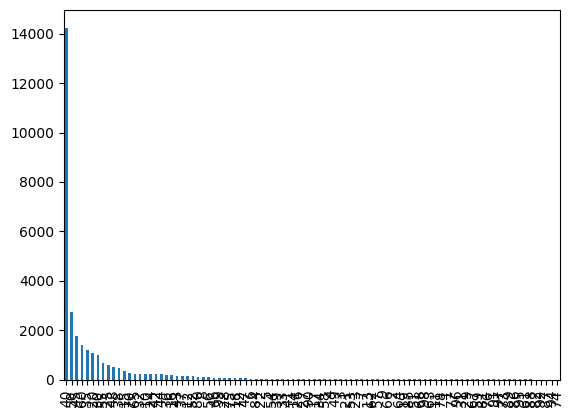

In [107]:
trainDataPreped["Hours-per-week"].value_counts().plot(kind= "bar")

In [104]:
for column in trainDataPreped.columns:
    print(column)
    print(trainDataPreped[str(column)].value_counts())
    print()

Age
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
85      3
88      3
86      1
Name: Age, Length: 72, dtype: int64

Workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1278
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: Workclass, dtype: int64

Fnlwgt
203488    13
123011    12
164190    12
148995    12
121124    12
          ..
243313     1
216292     1
151726     1
230824     1
27620      1
Name: Fnlwgt, Length: 20262, dtype: int64

Education-num
9     9840
10    6678
13    5043
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: Education-num, dtype: int64

Marital-status
Married-civ-spouse       14065
Never-married             9725
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married